In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import datetime as dt
import dateutil

In [22]:
# test api starting at the year 2000
test_url='https://www.quandl.com/api/v3/datasets/ZILLOW/Z95973_ZHVISF?start_date=2000-01-01&api_key=sPG_jsHhtuegYcT7TNWz'
response=requests.get(test_url).json()

In [126]:
# grabbing the data from the response
data=response['dataset']['data']
# data

In [99]:
# mapping the data to a list of lists since sklearn requires a 2D array
def pull_price(n):
    return [n[1]]
# date must be converted to ordinal since its a numeric value which regression requires
def pull_dates(n):
    return [dt.datetime.strptime(n[0], '%Y-%m-%d').toordinal()]
dates=list(map(pull_dates,data))
prices=list(map(pull_price,data))

In [127]:
#formatting the data to a numpy array 
y=np.array(prices)
# prices

In [149]:
# grabbing the latest date to be able to predict the next 12 months
latest_date=dt.date.fromordinal(dates[0][0])
# utility for adding months to a datetime object
a_month = dateutil.relativedelta.relativedelta(months=1)
# making 2 lists, one of the dates as strings, one as ordinals
next_year_ord=[]
next_year_strings=[]
temp=latest_date
for i in range(12):
    temp=temp+a_month
    next_year_ord.append([temp.toordinal()])
    next_year_strings.append(temp.strftime('%Y-%m-%d'))
next_year_ord

[[737545],
 [737575],
 [737606],
 [737636],
 [737667],
 [737698],
 [737728],
 [737759],
 [737789],
 [737820],
 [737849],
 [737877]]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(dates, y, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3366214515.976154
R-squared (R2 ): 0.30036487522836397


In [124]:
model.score(X_test, y_test)

0.30036487522836397

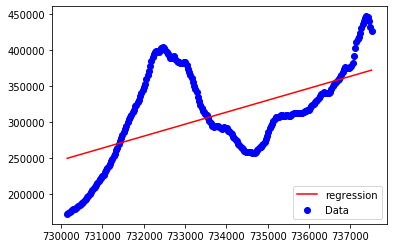

In [164]:
plt.scatter(dates,prices,label='Data',color='blue')
plt.plot(dates,model.predict(dates),label='regression',color='red')
plt.legend(loc='lower right')

In [159]:
# predicting the next year after the latest date
predictions=model.predict(next_year_ord)
predictions

array([[372457.23504933],
       [372955.23544117],
       [373469.83584607],
       [373967.83623791],
       [374482.43664281],
       [374997.03704771],
       [375495.03743955],
       [376009.63784445],
       [376507.63823629],
       [377022.23864119],
       [377503.63901997],
       [377968.43938569]])

In [157]:
to_return={}
for i in range(len(predictions)):
    to_return[next_year_strings[i]]=predictions[i][0]
to_return

{'2020-04-30': 372457.23504932784,
 '2020-05-30': 372955.23544116877,
 '2020-06-30': 373469.83584606834,
 '2020-07-30': 373967.8362379093,
 '2020-08-30': 374482.4366428107,
 '2020-09-30': 374997.03704771213,
 '2020-10-30': 375495.0374395512,
 '2020-11-30': 376009.63784445263,
 '2020-12-30': 376507.63823629357,
 '2021-01-30': 377022.23864119314,
 '2021-02-28': 377503.6390199736,
 '2021-03-28': 377968.4393856898}